Давыдов лаба 12 ммо

Распознавание лиц на фото и видео. Изучите прилагаемый блокнот.

1) Возьмите несколько фотографий (групповых, в разном ракурсе, попробуйте добавить животных и т.д.). Определите лица на фото, выделив их прямоугольной рамкой, при помощи библиотеки Open CV, face_recognition из dlib, MTCNN (дополнительно отметьте характерные признаки лиц точками). Сравните полученные результаты.

2) Подгрузите видео и образцы фото 3-х человек, которых надо найти на видео. Используя библиотеку face_recognition, получите ответ - кто из искомых личностей присутствует на видео.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_profileface.xml

--2024-04-08 16:44:17--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2024-04-08 16:44:17 (19.6 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2024-04-08 16:44:17--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_profileface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_profile_cascade = cv2.CascadeClassifier('haarcascade_profileface.xml')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1.jpg to 1.jpg
Файл(ы) "1.jpg" размером 1993009 байт загружен(ы)


In [ ]:
photos = list(filter(lambda x : '.jpg' in x, os.listdir()))
photos

['1.jpg']

Сначала фото, первый способ CV

In [ ]:
def face_det_cv2(photo_name):
    img = cv2.imread(photo_name)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Для детекции нужно сделать изображение черно-белым
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Детектируем лица в анфас
    faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(200, 200)) # 1.1 и 5 - это гиперпараметры, их перебор позволяет регулировать детекцию
    # Нарисуем зеленые прямоугольники вокруг лиц.
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)

    # проверим лица в профиль
    faces = face_profile_cascade.detectMultiScale(gray, 1.1, 3, minSize=(200, 200))
    # Нарисуем прямоугольники вокруг лиц.
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    # Посмотрим что получилось
    plt.figure(figsize=(8,8), dpi=90)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

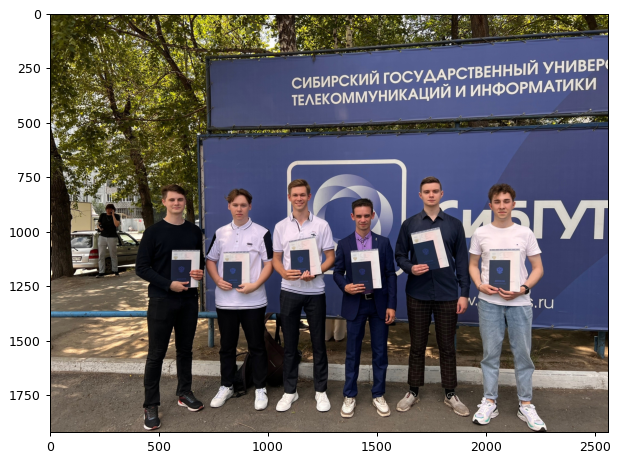

In [ ]:
for photo in photos:
    face_det_cv2(photo)

CV не смогла увидеть лиц на фото

Переходим к face_recognition

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=f7207a7ba795cb56722442348f437ff5621bd6c79c8bae73014415cebfba8b93
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition

In [ ]:
def face_det_fr(photo_name):
    image_processed = face_recognition.load_image_file(photo_name)
    face_location = face_recognition.face_locations(image_processed)
    img = cv2.imread(photo_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for (top, right, bottom, left) in (face_location):
        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 5)
    # Посмотрим что получилось
    plt.figure(figsize=(8,8), dpi=90)
    plt.imshow(img)
    plt.show()

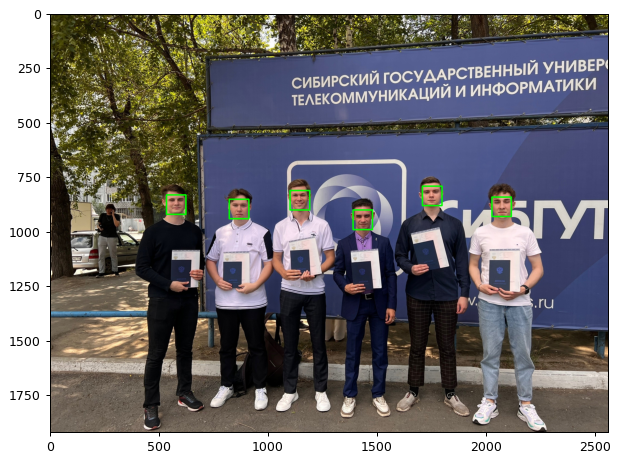

In [ ]:
for photo in photos:
    face_det_fr(photo)

Лица найдены

Теперь MTCNN

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.0 MB/s eta 0:00:00


In [ ]:
from mtcnn import MTCNN

In [ ]:
def face_det_mtcnn(photo_name):
    img = cv2.imread(photo_name)
    detector = MTCNN()

    face_list = detector.detect_faces(img) # face detect and alignment

    for face in face_list:
        box = face["box"]
        keypoints = face["keypoints"]

        # draw boundingbox
        x,y,w,h = box
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)

        # draw keypoints
        cv2.circle(img,keypoints["left_eye"],1,(0,0,255),5)
        cv2.circle(img,keypoints["right_eye"],1,(0,0,255),5)
        cv2.circle(img,keypoints["nose"],1,(0,0,255),5)
        cv2.circle(img,keypoints["mouth_left"],1,(0,0,255),5)
        cv2.circle(img,keypoints["mouth_right"],1,(0,0,255),5)

    # Посмотрим что получилось
    plt.figure(figsize=(8,8), dpi=90)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

2/2 [==============================] - 0s 129ms/step


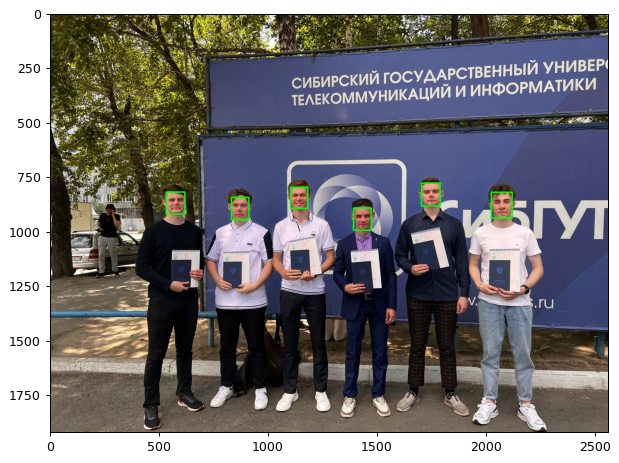

In [ ]:
for photo in photos:
    face_det_mtcnn(photo)

Лица также обнаружены

Теперь попробуем видео, я взял из блокнота

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/test_video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
input_video = "/content/test_video.mp4"

output_video = 'output.avi' #Выходное видео

output_video_res = (640, 360) #разрешение выходного видео

photo_pattern = "/content/face.jpg" # фото-образец для распознования на видео

sign_photo = "Denis" #Подпись лица на видео

In [ ]:
# открываем наше видео
input_movie = cv2.VideoCapture(input_video)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter(output_video, fourcc, 25, output_video_res)

image = face_recognition.load_image_file(photo_pattern)
face_encoding = face_recognition.face_encodings(image)[0]

known_faces = [
    face_encoding
]

face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while True:
    # Берем отдельный кадр видео
    ret, frame = input_movie.read()
    frame_number += 1

    # Если кадры кончились, то завершаем цикл
    if not ret:
        break

    # Преобразовываем каждый кадр из BGR -> RGB (особенности работы opencv)
    rgb_frame = frame[:, :, ::-1]

    # Находим все лица на текущем кадре
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:

        # Проверяем, есть ли целевое лицо среди найденных
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)


        name = None
        if match[0]:
            name = sign_photo # Если найдено целевое лицо, то присваиваем переменной нужную подпись

        face_names.append(name)

    # Подписываем результат
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2) # Обводим лицо рамкой зеленого цвета

        # Рисуем квадрат с подписью на кадре
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 255, 0), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Записываем текущий кадр в наше видео
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

Writing frame 1 / 154
Writing frame 2 / 154
Writing frame 3 / 154
Writing frame 4 / 154
Writing frame 5 / 154
Writing frame 6 / 154
Writing frame 7 / 154
Writing frame 8 / 154
Writing frame 9 / 154
Writing frame 10 / 154
Writing frame 11 / 154
Writing frame 12 / 154
Writing frame 13 / 154
Writing frame 14 / 154
Writing frame 15 / 154
Writing frame 16 / 154
Writing frame 17 / 154
Writing frame 18 / 154
Writing frame 19 / 154


TypeError: compute_face_descriptor(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], face: _dlib_pybind11.full_object_detection, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vector
    2. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], num_jitters: int = 0) -> _dlib_pybind11.vector
    3. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], faces: _dlib_pybind11.full_object_detections, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectors
    4. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: List[numpy.ndarray[(rows,cols,3),numpy.uint8]], batch_faces: List[_dlib_pybind11.full_object_detections], num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectorss
    5. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: List[numpy.ndarray[(rows,cols,3),numpy.uint8]], num_jitters: int = 0) -> _dlib_pybind11.vectors

Invoked with: <_dlib_pybind11.face_recognition_model_v1 object at 0x7e54f87a7d30>, array([[[30, 21, 17],
        [30, 21, 17],
        [30, 21, 17],
        ...,
        [47, 62, 50],
        [47, 62, 50],
        [47, 62, 50]],

       [[30, 21, 17],
        [30, 21, 17],
        [30, 21, 17],
        ...,
        [47, 62, 50],
        [47, 62, 50],
        [47, 62, 50]],

       [[30, 21, 17],
        [30, 21, 17],
        [30, 21, 17],
        ...,
        [47, 62, 50],
        [47, 62, 50],
        [47, 62, 50]],

       ...,

       [[36, 37, 29],
        [36, 37, 29],
        [39, 35, 29],
        ...,
        [26,  1,  2],
        [26,  1,  2],
        [26,  1,  2]],

       [[36, 37, 29],
        [38, 39, 31],
        [41, 37, 31],
        ...,
        [26,  1,  2],
        [26,  1,  2],
        [26,  1,  2]],

       [[36, 37, 29],
        [38, 39, 31],
        [41, 37, 31],
        ...,
        [26,  1,  2],
        [26,  1,  2],
        [26,  1,  2]]], dtype=uint8), <_dlib_pybind11.full_object_detection object at 0x7e548df023f0>, 1

Возникла ошибка при передаче параметров в функцию для обнаружения лиц.

In [ ]:
!ffmpeg -i output.avi output.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Если здесь по-прежнему ошибка, значит я так и не доделал лабу.